<center><h1>Computer lab 4: Ordinary Differential Equations (ODEs)</h1></center>
<center><h2>Part 2: Application: Predator-prey</h2></center>

_In this part of the lab we continue with a system of ODE's._ <br>
<hr>

<p>First, import the <b>NumPy</b> and <b>matplotlib</b> libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Another example: Foxes and rabbits</h3>

<h4>Background</h4>
<p>
Predator and prey animals, such as hawks and mice or foxes and rabbits, interact in an ecosystem where predator eat prey. If the prey population is large, food becomes easily available for the predator and the population grows. This leads to a decrease in the prey population, which, in turn, leads to reduced access to food. After a time this will entail a decrease in the predator population and more prey survives, and so forth. This process continues indefinitely. To investigate the dynamics of the predator-prey system, the process can be modelled by ODEs.
</p>
<p>
A matematical model describing predator-prey system are the <i>Lotka-Volterra equations:</i><br><br>
$$ \left\{ \begin{array}{l}
y_1'(t) = a y_1 - b y_1 y_2\\
y_2'(t) = c y_1 y_2 - dy_2, \; \; t \ge 0\\
y_1(0) = \hat{y}_1, \; y_2(0)=\hat{y}_2 \;, \; \mbox{initial values}
\end{array} \right.
$$  
</p>
<p>
The variables $y_1$ and $y_2$ are the average densities of prey ($y_1$) and predator ($y_2$) in a particular geographical area, and $a$, $b$, $c$ and $d$ are parameters describing the interaction between the spieces and the rate in which they reproduce.
</p>
<p>
(There are certain assumptions implicit in the model, such as predators have limitless appetite, the environment does not change in favor for one species etc. These are not necessarily realizable in nature.)
</p>
<p>
As you can see this model is a system of two ODEs, and the equations are dependent on each other. To solve the first equation ($y_1$) we need $y_2$. But we get $y_2$ by solving the 2nd equation, which depend on $y_1$. Therefore the whole system must be solved simultaneously, you can't solve for $y_1$ first and then solve for $y_2$.
</p>
            

<h4>Simulation of foxes and rabbits</h4>
<p>To get the solution of the Predator-Prey ODE we do pretty much the same as for the bacterial growth, but we need somehow to define a system of right-hand-sides and two intial values.<br>
Let's say we have 100 rabbits (i.e. prey $y_1(0)=100$) and 50 foxes (i.e. predator $y_2(0)=50$) initially, and the parameters are defined as $a=54$, $b=0.035$, $c=0.03$, $d=0.80$. Run the code to solve the ODE with that setting.
</p>

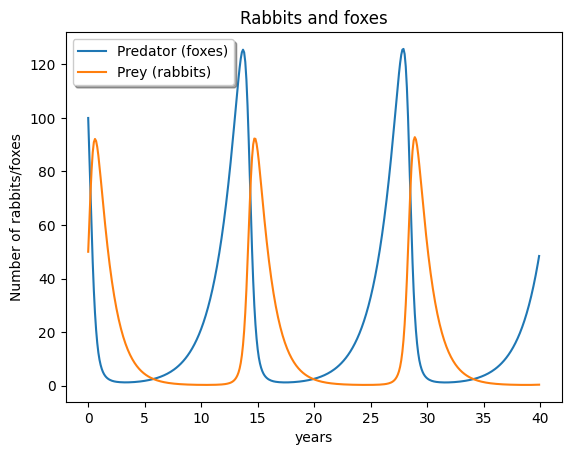

In [ ]:
# Run to solve the ODE
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp


# This function defines the right-hand-side in
# the ODE. Note that it is a system of two equations, and y will
# contain two variables, y_1(t) and y_2(t)
def ode_rhs(t, y, a, b, c, d):
    y1, y2 = y
    yt = [a * y1 - b * y1 * y2, c * y1 * y2 - d * y2]
    return yt


t0 = 0  # Start time
t1 = 40  # Final time
tspan = (t0, t1)  # Time interval
prey0 = 100  # Initial number of prey (rabbits, y1)
pred0 = 50  # Initial number of predator (foxes, y2)
y0 = [prey0, pred0]  # Initial values, a list [y1(0) y2(0)]

# Define parameters
a = 0.54
b = 0.035
c = 0.030
d = 0.80

times = np.arange(t0, t1, 0.1)  # This define at what times the solution is stored
predprey = solve_ivp(ode_rhs, tspan, y0, t_eval=times, args=(a, b, c, d))

# Plot the solution
# Time stored in predprey.t, Predator in predprey.y[0], Prey in predprey.y[1]
plt.plot(predprey.t, predprey.y[0], label="Predator (foxes)")  # Predator in y[0]
plt.plot(predprey.t, predprey.y[1], label="Prey (rabbits)")  # Prey in y[1]
plt.title("Rabbits and foxes")
plt.xlabel("years")
plt.ylabel("Number of rabbits/foxes")
plt.legend(shadow=True)
plt.show()

<p>Run the below code, to check the shape of the time vector (here <code>predprey.t</code>) and solution vector (here <code>predprey.y</code>. How many columns and how many rows? </p>
<p>
Try to answer the questions
<ul>
<li>The time-interval has automatically been divided into a certain number of time points. How many points is it divided into?
<li>The solution vector $y$ has two rows in this case. What is stored in row 1, and what is stored in row 2?</li>
</ul>
</p>

In [3]:
# Check the shape here
print(np.shape(predprey.y))
print(np.shape(predprey.t))
print(predprey.nfev)

(2, 400)
(400,)
356


<p>
What we work with here is still and ODE written as $y'(t)=f(t,y)$ but with
$$ \begin{array}{cc}
y´(t)=\left( \begin{array}{l}
y_1'(t)\\
y_2'(t)
\end{array} \right)
&
f(t,y) =\left( \begin{array}{l}
a y_1 - b y_1 y_2\\
c y_1 y_2 - dy_2
\end{array} \right)      
\end{array}
$$
</p>
<p>
i.e. both $y'$ and the right-hand-side $f(t,y)$ are vectors (with two components). The solution will also be a vector with two components:
$$ y(t)=\left( \begin{array}{l}
y_1(t)\\
y_2(t)
\end{array} \right)  
$$
</p>
<p>
Compare this with the shape of <code>predeprey.y</code> that you've got.</p>
<p>
 The conclusion is: It does not really matter if we have 1 equation in the ODE or if it is a system with many equations. We still use the same ODE-solver, with the same input arguments. The only difference is that $y$ and $y_0$ are arrays (or lists in Python), and the right-hand-side Python function (here called <code>ode_rhs</code>) must deal with lists.
</p>

<h4>Changing the accuracy</h4>
<p>
Pythons (or <b>ScyPy</b>s) ODE-solver work with a default accuracy. The default is relative accuracy $=10^{-3}$ and absolute accuracy $=10^{-6}$ (meaning that we get 6 correct decimal places). This accuracy can be changed by adding input arguments <code>atol</code> and/or <code>rtol</code> when calling <code>solve_ivp</code>.</p>
<p>
Copy and paste the ODE-solution code to the cell below and add the command <code>print(predprey.nfev)</code> after (or before) the plotting. This will tell you how many function evaluations, i.e. how many times <code>solve_ivp</code> will will call your right-hand-side function <code>ode_rhs</code>.
<ul>
<li>Run the code with the default accuracy (i.e. do not change the settings). How many function evaluations did you get? </li>
<li>Change both relative and absolute accuracy to $10^{-10}$, i.e. much higher accuracy. How many function evaluations?</li>
<li>Change both relative and absolute accuracy to $10^{-2}$, i.e. much lower accuracy. How many function evaluations?.</li>
</ul>
    </p>

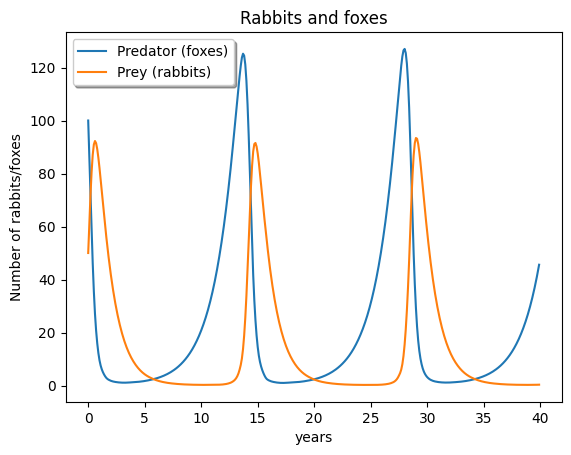

248


In [6]:
t0 = 0  # Start time
t1 = 40  # Final time
tspan = (t0, t1)  # Time interval
prey0 = 100  # Initial number of prey (rabbits, y1)
pred0 = 50  # Initial number of predator (foxes, y2)
y0 = [prey0, pred0]  # Initial values, a list [y1(0) y2(0)]

# Define parameters
a = 0.54
b = 0.035
c = 0.030
d = 0.80

times = np.arange(t0, t1, 0.1)  # This define at what times the solution is stored
predprey = solve_ivp(
    ode_rhs, tspan, y0, t_eval=times, args=(a, b, c, d), rtol=1e-2, atol=1e-2
)

# Plot the solution
# Time stored in predprey.t, Predator in predprey.y[0], Prey in predprey.y[1]
plt.plot(predprey.t, predprey.y[0], label="Predator (foxes)")  # Predator in y[0]
plt.plot(predprey.t, predprey.y[1], label="Prey (rabbits)")  # Prey in y[1]
plt.title("Rabbits and foxes")
plt.xlabel("years")
plt.ylabel("Number of rabbits/foxes")
plt.legend(shadow=True)
plt.show()
print(predprey.nfev)

<p>
A better accuracy leads to a higher number of functions evaluation, i.e. more computational work. The choice of accuracy is a trade-off between the accuracy and the compuational work (and computing time). Usually the default accuracy is good enough and you don't really need to bother about it, but there are cases when higher accuracy might be needed.<br><br>
To change the accuracy is equivalent to changing the error. This is however not the roundoff error that is changed, but the so-called <i>discretization error</i>. We will look at that error and where it comes from in the next part of this lab.
</p>

<h3>General conclusions</h3>
<p>
The ODE is often a system of ODEs as we will se later in the lab, i.e. both $y$ and $f(t,y)$ are vectors:<br><br>
$$ \left\{ \begin{array}{l}
\bar{y}'(t) = \bar{f}(t,\bar{y})\\
\bar{y}(t_0) = \bar{y}_0, \; \; t\ge t_0
\end{array} \right.
$$
</p>
<p>
It is in principle not more complicated to calculate the solution to a system of ODE's compared with a single ODE. The difference is that the right-hand-side, $\bar{f}(t,\bar{y})$ must be defined as a vector.
</p>